In [2]:
#load input library #

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt###
                               ### Visualisation tools
import seaborn as sns          ###

from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor , Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB





In [6]:
train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')

In [7]:
#Concatenate the splitted data
df = pd.concat([train,test],ignore_index=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [10]:
#Shape of the data (rows,columns)
df.shape

(1852394, 22)

In [11]:
#Finding dtypes and other basic info about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [12]:
#dividing data into categorical and numerical
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(exclude = 'object')
le = LabelEncoder()

In [14]:
nan_df = pd.DataFrame(data = (df.isnull().sum()/len(df))*100,columns = ['% of missing values'])

In [15]:
nan_df

,% of missing values
trans_date_trans_time,0.0
cc_num,0.0
merchant,0.0
category,0.0
amt,0.0
first,0.0
last,0.0
gender,0.0
street,0.0
city,0.0


In [10]:
#there is no null values

In [16]:
df['gender_le']  = le.fit_transform(df['gender'])


In [28]:
# Seperating  numerical from nominal
# cutting off some data to avoid heavy cpu usage
df2 = df.select_dtypes(exclude = 'object')
df2 = df2.loc[:14999]


In [29]:
df2.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,gender_le
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,1
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,1
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,1


In [30]:
# dropping the feature which is not useful for data analysis
df2 = df2.drop(['cc_num'],axis=1)
# seperating target and independent features
x = df2.drop('is_fraud',axis=1)
y = df2['is_fraud']

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7 , random_state = 10)

In [32]:
df_num = df_num.drop(['cc_num'],axis=1)

In [33]:
df_num = df_num.drop('is_fraud',axis=1)

In [34]:
# Scaling the data
ss = StandardScaler()
xtrain[df_num.columns] = ss.fit_transform(xtrain[df_num.columns])
xtest[df_num.columns] = ss.fit_transform(xtest[df_num.columns])


In [35]:
#Building a Logistic Regression Model

lr = LogisticRegression()
model_v1 = lr.fit(xtrain,ytrain)

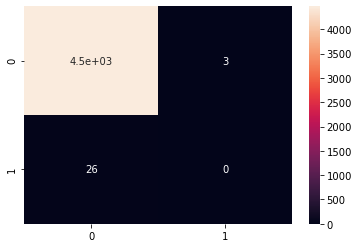

In [36]:
#  predict and confusion matrix

ypred = model_v1.predict(xtest)
cm  = confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [37]:
#classification report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4474
           1       0.00      0.00      0.00        26

    accuracy                           0.99      4500
   macro avg       0.50      0.50      0.50      4500
weighted avg       0.99      0.99      0.99      4500



In [38]:
#KNN model
knn = KNeighborsClassifier()
model_v2 = knn.fit(xtrain,ytrain)
ypred1 = model_v2.predict(xtest)

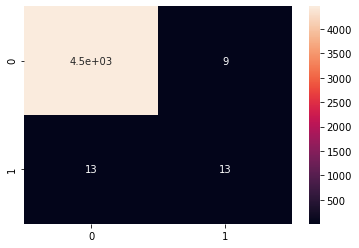

In [39]:
cm_knn = confusion_matrix(ytest,ypred1)
sns.heatmap(cm_knn,annot=True)

In [40]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4474
           1       0.00      0.00      0.00        26

    accuracy                           0.99      4500
   macro avg       0.50      0.50      0.50      4500
weighted avg       0.99      0.99      0.99      4500



In [41]:
#Naive Bayes model
nb =GaussianNB()
model_v3 = nb.fit(xtrain,ytrain)


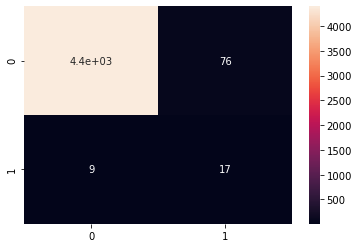

In [42]:
ypred = model_v3.predict(xtest)
cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [43]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4474
           1       0.18      0.65      0.29        26

    accuracy                           0.98      4500
   macro avg       0.59      0.82      0.64      4500
weighted avg       0.99      0.98      0.99      4500



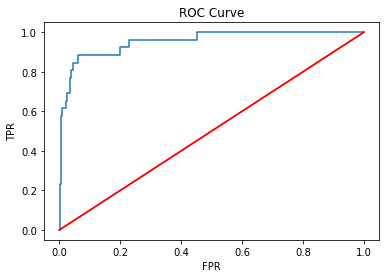

In [44]:
#### ROC curve
## Logistic Regression Model
prob = model_v1.predict_proba(xtest)[:,1]
fpr,tpr,threshold = roc_curve(ytest,prob)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

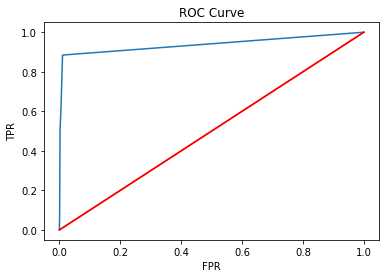

In [45]:
## KNN Classifier Model
prob1 = model_v2.predict_proba(xtest)[:,1]
fpr,tpr,threshold = roc_curve(ytest,prob1)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

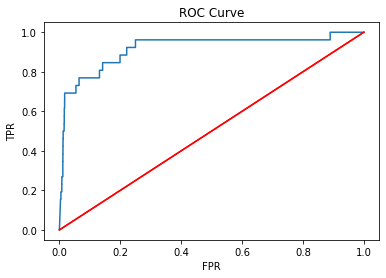

In [46]:
## Naive Bayes Model
prob2 = model_v3.predict_proba(xtest)[:,1]
fpr,tpr,threshold = roc_curve(ytest,prob2)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

KNN: 0.994952 (0.001706)
LR: 0.993429 (0.002018)
NB: 0.978571 (0.005203)


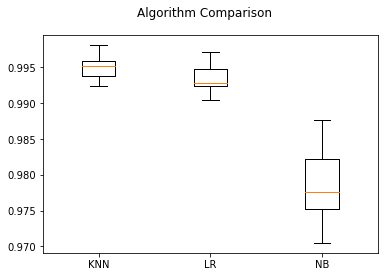

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, xtrain, ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# <h>Conclusion</h>
1. KNN Classifier gave the best ROC curve followed by Logistic Regression then Naive Bayes
2. But when it comes to scores , I consider f1_weighted average score as the best one ; in that regard all 3 models gave 0.99 in classification report
3. Since KNN Classifier had edge in ROC curve , I am concluding it is as the most reliable model to give a prediction out of the three models

# Prediction

In [48]:
ypred = model_v2.predict(xtest)

In [49]:
prediction = pd.DataFrame()
prediction['Serial No.'] = xtest.index
prediction['is_fraud_pred'] = ypred

In [50]:
prediction[prediction['is_fraud_pred']==1]

,Serial No.,is_fraud_pred
7,6110,1
177,3722,1
273,4397,1
346,4744,1
461,7990,1
854,14335,1
1882,12069,1
1902,5612,1
1932,14370,1
1933,11586,1


In [69]:
import numpy as np


class LogisticRegression:
    def _init_(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


# Testing
if __name__ == "_main_":
    # Imports
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

   
    X,y = df_num.iloc[ : , :-1], df_num.iloc [ : ,-1]
    

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, random_state=1234
    )

    regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    print("LR classification accuracy:", accuracy(y_test, predictions))